In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Loading the image (try with one oumabed sahel)
Image1 = cv2.imread('../Projet/the_dataset/test/fruits/apples/img001.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

#plt.imshow(Image1)
#plt.imshow(training_image)
#plt.imshow(training_gray)

The figure's x and y are :  Figure(1440x720)


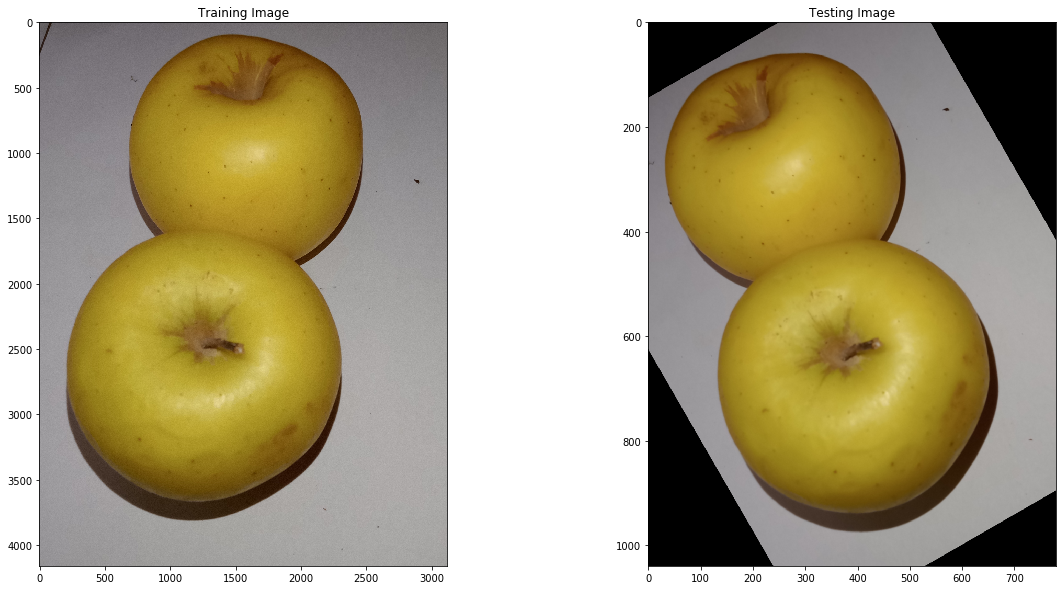

In [3]:
# Create test image by adding Scale Invariance and Rotational Invariance
def Scale_and_Rotational_Invariance(training_image):
    test_image = cv2.pyrDown(training_image)
    test_image = cv2.pyrDown(test_image)
    num_rows, num_cols = test_image.shape[:2]

    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
    test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

    test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

    # Display traning image and testing image
    fx, plots = plt.subplots(1, 2, figsize=(20,10))

    plots[0].set_title("Training Image")
    plots[0].imshow(training_image)

    plots[1].set_title("Testing Image")
    plots[1].imshow(test_image)
    return test_gray, fx

test_gray, fx = Scale_and_Rotational_Invariance(training_image)
print(f"The figure's x and y are : ", fx)


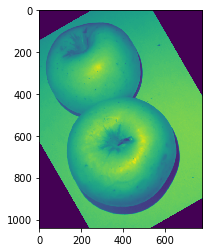

In [4]:
plt.imshow(test_gray)

Number of Keypoints Detected In The Training Image:  333
Number of Keypoints Detected In The Query Image:  60
The figure's x and y are :  Figure(1440x720)
training key points: 
   (< cv2.KeyPoint 000002503BD44F90>, < cv2.KeyPoint 000002503BD449C0>, < cv2.KeyPoint 000002503BD44C30>, < cv2.KeyPoint 000002503BCFAED0>, < cv2.KeyPoint 000002503BCFAF60>, < cv2.KeyPoint 0000025033808420>, < cv2.KeyPoint 0000025033808360>, < cv2.KeyPoint 000002503372C780>, < cv2.KeyPoint 000002503BD78AB0>, < cv2.KeyPoint 000002503BD8D720>, < cv2.KeyPoint 000002503BD8D630>, < cv2.KeyPoint 000002503BD8D690>, < cv2.KeyPoint 000002503BD8D6C0>, < cv2.KeyPoint 000002503BD8D6F0>, < cv2.KeyPoint 000002503BD8D750>, < cv2.KeyPoint 000002503BD8D780>, < cv2.KeyPoint 000002503BD8D7B0>, < cv2.KeyPoint 000002503BD8D7E0>, < cv2.KeyPoint 000002503BD8D810>, < cv2.KeyPoint 000002503BD8D840>, < cv2.KeyPoint 000002503BD8D870>, < cv2.KeyPoint 000002503BD8D8A0>, < cv2.KeyPoint 000002503BD8D8D0>, < cv2.KeyPoint 000002503BD8D900>, < c

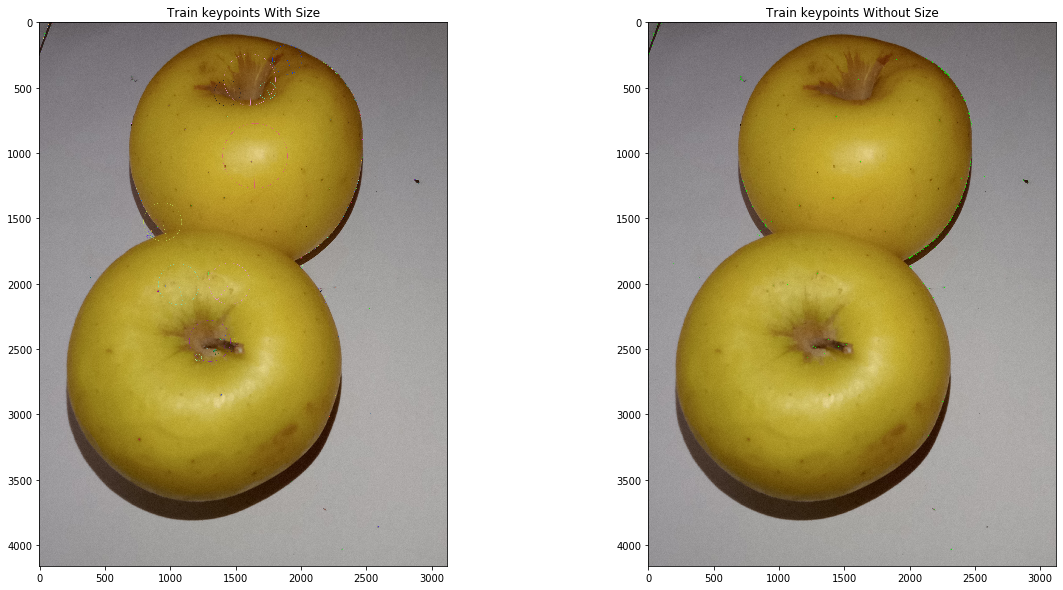

In [5]:
def detectKeypoints_and_Create_Descriptor(training_image):
    sift = cv2.SIFT_create()

    train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display image with and without keypoints size
    fx, plots = plt.subplots(1, 2, figsize=(20,10))

    plots[0].set_title("Train keypoints With Size")
    plots[0].imshow(keypoints_with_size, cmap='gray')

    plots[1].set_title("Train keypoints Without Size")
    plots[1].imshow(keypoints_without_size, cmap='gray')

    # Print the number of keypoints detected in the training image
    print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

    # Print the number of keypoints detected in the query image
    print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))
    return train_descriptor, test_descriptor,fx, train_keypoints, test_keypoints

traindesc, testdesc, fx, trainkeypoints, test_keypoints = detectKeypoints_and_Create_Descriptor(training_image)
print(f"The figure's x and y are : ", fx)
print(f"training key points: \n  ", trainkeypoints, "\n testing key points \n ", test_keypoints)

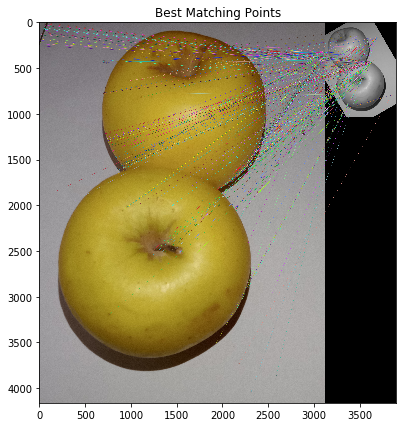


Number of Matching Keypoints Between The Training and Query Images:  333


In [6]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(traindesc, testdesc)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, trainkeypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
